<a href="https://colab.research.google.com/github/HMMJ-1991/bike-sharing/blob/master/prophet_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font color="red">Import packages </font>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
cd drive

In [0]:
cd My Drive

In [0]:
cd MSC/Data\ science

In [3]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from fbprophet import Prophet
import holidays


In [45]:
data=pd.read_csv('../data/daily_count.csv')

In [46]:
data.head()

,date,number of users
0,2018-01-01,21
1,2018-01-02,126
2,2018-01-03,150
3,2018-01-04,70
4,2018-01-05,84


In [6]:
data['date']=pd.to_datetime(data['date'])

In [7]:
data['day']=data['date'].dt.day

In [8]:
data.head()

,date,number of users,day
0,2018-01-01,21,1
1,2018-01-02,126,2
2,2018-01-03,150,3
3,2018-01-04,70,4
4,2018-01-05,84,5


In [9]:
data_jan=data[data.date.dt.month==1]

In [10]:
data_2018_jan=data_jan[data_jan.date.dt.year==2018]

In [11]:
data_2019_jan=data_jan[data_jan.date.dt.year==2019]

In [13]:
data_2020_jan=data_jan[data_jan.date.dt.year==2020]

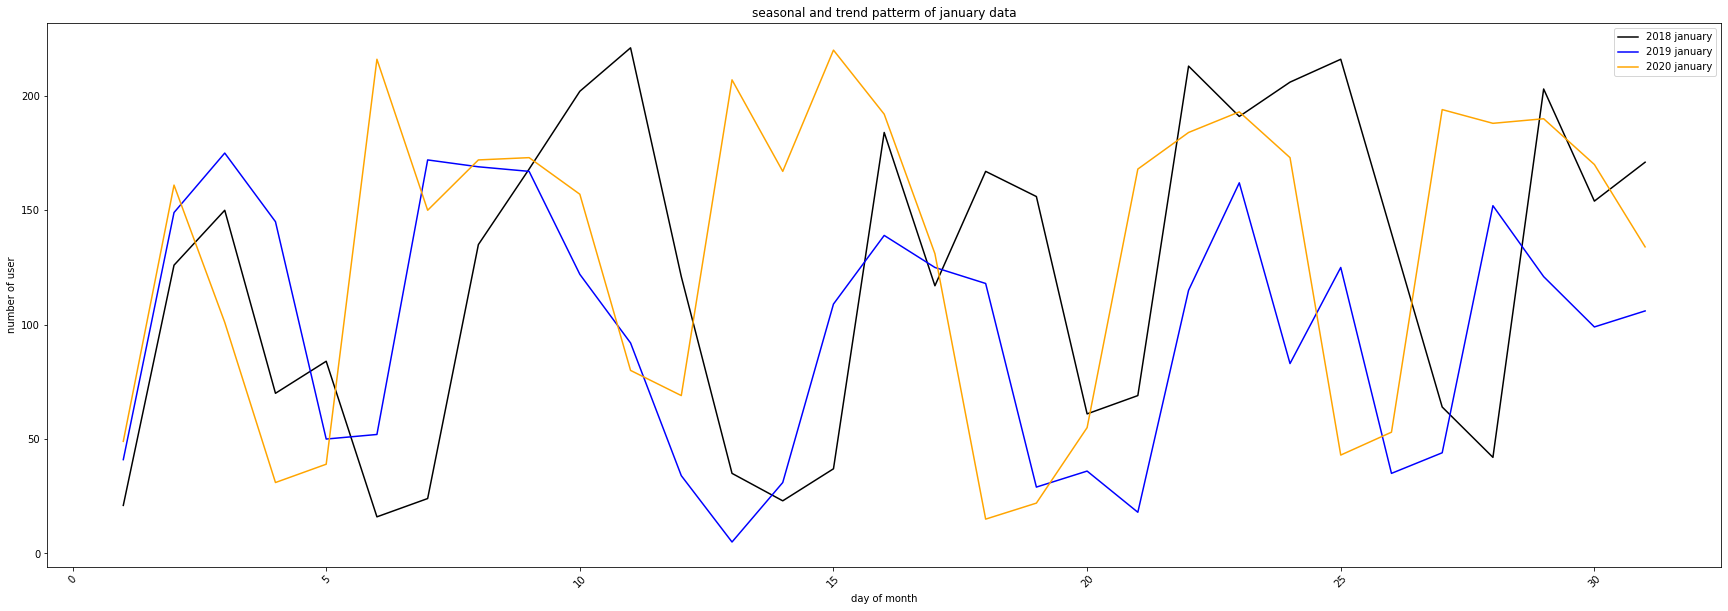

In [15]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(rotation=45)
plt.title('seasonal and trend patterm of january data')
plt.plot(data_2018_jan['day'],data_2018_jan['number of users'],label='2018 january',color='black')
plt.plot(data_2019_jan['day'],data_2019_jan['number of users'],label='2019 january',color='blue')
plt.plot(data_2020_jan['day'],data_2020_jan['number of users'],label='2020 january',color='orange')
plt.legend()
plt.xlabel('day of month')
plt.ylabel('number of user')
plt.show()

In [47]:
#!pip install fbprophet

In [48]:
from fbprophet import Prophet

In [49]:
data1=data[['date','number of users']]

In [50]:
data1.columns=['ds','y']

In [51]:
data_train=data1.iloc[0:-60,:]
data_test=data1.iloc[-60:,:]

In [52]:
len(data_test)

60

In [53]:
data_train.tail()

,ds,y
695,2019-12-27,73
696,2019-12-28,36
697,2019-12-29,15
698,2019-12-30,91
699,2019-12-31,88


In [54]:
model = Prophet()

In [55]:
model.fit(data_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
future_data = model.make_future_dataframe(periods=60, freq = 'd')

In [57]:
forecast_data = model.predict(future_data)

In [58]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
755,2020-02-25,172.722082,109.976585,238.230587
756,2020-02-26,174.754772,110.560379,239.321099
757,2020-02-27,167.999007,105.066003,234.202570
758,2020-02-28,135.583370,69.445757,194.737336
759,2020-02-29,36.768831,-25.252902,97.306056


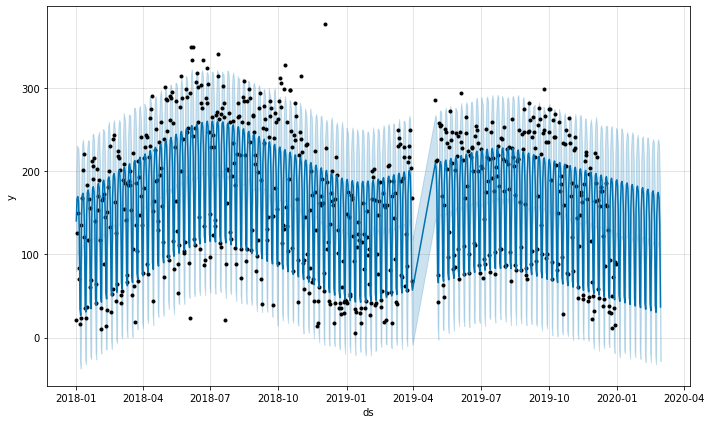

In [37]:
model.plot(forecast_data)
plt.show()

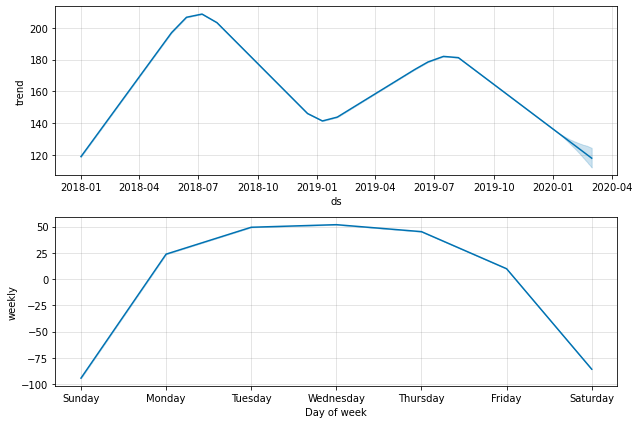

In [30]:
model.plot_components(forecast_data)
plt.show()

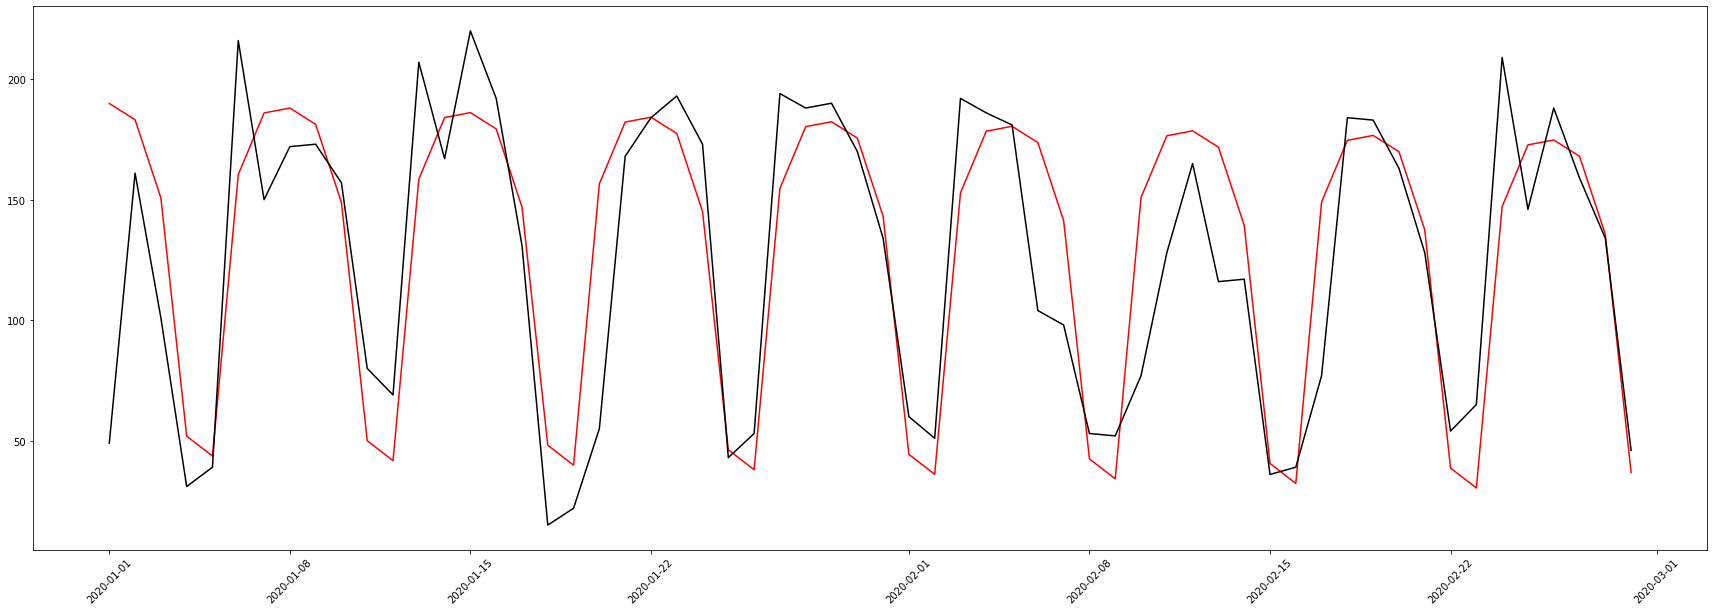

In [38]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(rotation=45)
plt.plot(forecast_data['ds'].iloc[-60:],forecast_data["yhat"].iloc[-60:],color='red')
plt.plot(data_test['ds'],data_test["y"],color='black')


In [59]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='60 days', period='60 days', horizon = '60 days')
df_cv.head()

INFO:fbprophet:Making 11 forecasts with cutoffs between 2018-03-11 00:00:00 and 2019-11-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-03-12,167.623662,117.560631,216.252900,184,2018-03-11
1,2018-03-13,212.724953,164.855342,263.662550,188,2018-03-11
2,2018-03-14,203.325996,156.555702,252.549178,200,2018-03-11
3,2018-03-15,210.127120,159.115938,257.256917,184,2018-03-11
4,2018-03-16,149.727928,97.069616,198.485311,153,2018-03-11


In [60]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
print(df_p.head())
df_p.to_csv(r'../data/performance_metrics.csv', index = False)


  horizon          mse       rmse        mae      mape     mdape  coverage
0  6 days  2540.585769  50.404224  37.824624  0.314059  0.207436  0.829726
1  7 days  2965.456647  54.456007  40.853953  0.336093  0.212705  0.786436
2  8 days  3273.242827  57.212261  43.045469  0.366666  0.232653  0.770563
3  9 days  4365.496124  66.071901  49.093393  0.495237  0.280404  0.702742
4 10 days  5274.794034  72.627777  54.583201  0.674866  0.311038  0.639250


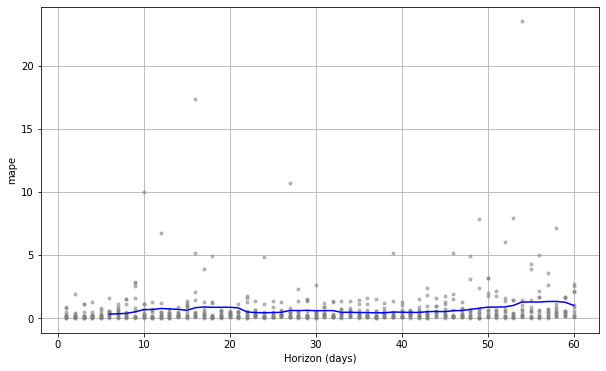

In [34]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')